# Optimal Control Simulation

In [1]:
# The autoreload extension will automatically load in new code as you edit files, 
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
from utils import simulate_car_dyn, maybe_makedirs
from P4_optimal_control import main
from P3_trajectory_tracking import TrajectoryTracker

maybe_makedirs('plots')

## Compute Trajectory
Run the BVP solver and extract trajectory and times

In [2]:
z, V, om = main()

x_0 = z[0,0]
y_0 = z[0,1]
th_0 = z[0,2]

tf = z[0,-1]
times = np.linspace(0, tf, z.shape[0])
traj = z[:,:3]

In [9]:
noise_scale = np.sqrt(0.4)

## Simulate Open Loop

In [10]:
actions_ol = np.stack([V, om], axis=-1)
states_ol, ctrl_ol = simulate_car_dyn(x_0, y_0, th_0, times, actions=actions_ol, noise_scale=noise_scale)

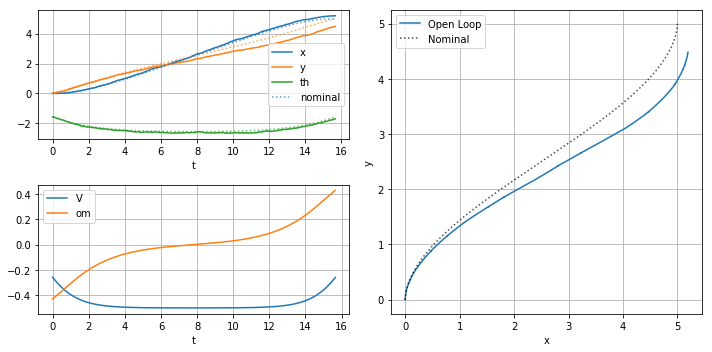

In [11]:
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
plt.plot(times, states_ol)
plt.plot(times, traj[:,0], linestyle=':', color='C0', alpha=0.7)
plt.plot(times, traj[:,1], linestyle=':', color='C1', alpha=0.7)
plt.plot(times, traj[:,2], linestyle=':', color='C2', alpha=0.7)
plt.grid(True)
plt.xlabel('t')
plt.legend(labels=["x","y","th","nominal"])
plt.subplot(2,2,3)
plt.plot(times[:-1], ctrl_ol)
plt.grid(True)
plt.xlabel('t')
plt.legend(labels=["V","om"])
plt.subplot(1,2,2)
plt.plot(states_ol[:,0], states_ol[:,1])
plt.plot(traj[:,0], traj[:,1], color="k", linestyle=":", alpha=0.7)
plt.legend(labels=["Open Loop", "Nominal"])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/sim_traj_optimal_control.pdf")
plt.show()